# Lesson 29: Introduction to Pandas

*This lesson was generated from a Jupyter notebook.  You can download the notebook [here](l29_intro_to_pandas.ipynb).*

In [1]:
# NumPy of course
import numpy as np

# Pandas, conventionally imported as pd
import pandas as pd

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# Seaborn makes plots pretty!
import seaborn as sns

# PyBeeswarm for some better data display
import beeswarm

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

# Set JB's favorite Seaborn settings
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18, 
    'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)

Throughout your research career, you will undoubtedly need to handle data, possibly lots of data.  The data comes in lots of formats, and you will spend much of your time **munging** (or **wrangling**) the data to get it into a usable form.  We already did a little bit of munging when we sorted the *C. elegans* egg cross sectional areas to be able to compute cumulative histograms.

Pandas is the primary tool in the SciPy stack for handling data.  Its primary object, the `DataFrame` is extremely useful in munging data.  We will explore some of that functionality here, and will put it to use in the next lesson.

## Munging the egg cross-sectional area data
It os often useful to use the same data set to learn new things, since you are already familiar with the data.  We'll keep using the egg cross-sectional area data set.  In this case, we will sue `Pandas` to import the data.  We use the very handy (and faaaaar more powerful than `np.loadtxt()`) function `pd.read_csv()`.

In [2]:
# Read in data files with pandas
df_high = pd.read_csv('../data/xa_high_food.csv', comment='#')
df_low = pd.read_csv('../data/xa_low_food.csv', comment='#')

Almost the same syntax as `np.loadtxt()`, but notice that the kwarg is `comment` and not `comments`.  Let's now look at what we have.

In [3]:
df_high

,1683
0,2061
1,1792
2,1852
3,2091
4,1781
5,1912
6,1802
7,1751
8,1731
9,1892


Whoa!  IPython is displaying this is a different way!  What kind of data type is this?

In [4]:
type(df_low)

pandas.core.frame.DataFrame

Pandas has loaded the data in as a `DataFrame`.  As I mentioned before, this is the central object for handling data.

We see that we have a bold column heading (**`1683`**) and bold row indices.  Pandas interpreted the first non-comment line as a label for a column.  We need to tell it not to do that using the `header` kwarg.  Let's re-load the data.

In [5]:
# Read in data files with pandas with no row headings.
df_high = pd.read_csv('../data/xa_high_food.csv', comment='#', header=None)
df_low = pd.read_csv('../data/xa_low_food.csv', comment='#', header=None)

# Now look at it
df_high

,0
0,1683
1,2061
2,1792
3,1852
4,2091
5,1781
6,1912
7,1802
8,1751
9,1731


We see that Pandas has assigned a column heading of `0` to the column of data.  What happens if we index it?

In [6]:
df_high[0]

0     1683
1     2061
2     1792
3     1852
4     2091
5     1781
6     1912
7     1802
8     1751
9     1731
10    1892
11    1951
12    1809
13    1683
14    1787
15    1840
16    1821
17    1910
18    1930
19    1800
20    1833
21    1683
22    1671
23    1680
24    1692
25    1800
26    1821
27    1882
28    1642
29    1749
30    1712
31    1661
32    1701
33    2141
34    1863
35    1752
36    1740
37    1721
38    1660
39    1930
40    2030
41    1851
42    2131
43    1828
Name: 0, dtype: int64

Whoa again!  What is this?

In [7]:
type(df_high[0])

pandas.core.series.Series

A Pandas `Series` is basically a one-dimensional `DataFrame`.  When we index it, we get what we might expect.

In [8]:
df_high[0][0]

1683

### An aside:  Football and learning what Pandas Series and DataFrames are

We can think of a Pandas `Series` as a generalized NumPy array.  NumPy arrays are indexed with integers, but Pandas `Series` may be indexed with anything.  As an example, we'll create a `Series` from a dictionary.

In [9]:
# Dictionary of top men's World Cup scorers and how many goals
wc_dict = {'Klose': 16,
           'Ronaldo': 15,
           'Müller': 14,
           'Fontaine': 13,
           'Pelé': 12,
           'Koscis': 11,
           'Klinsmann': 11}

# Create a Series from the dictionary
s_goals = pd.Series(wc_dict)

# Take a look
s_goals

Fontaine     13
Klinsmann    11
Klose        16
Koscis       11
Müller       14
Pelé         12
Ronaldo      15
dtype: int64

We'll notice that the indexing now works like the dictionary that created it.

In [10]:
s_goals['Klose']

16

Now, what if we wanted to add more data to this, such as the country that each player represented?  We can make another `Series`.

In [11]:
# Dictionary of nations
nation_dict = {'Klose': 'Germany',
               'Ronaldo': 'Brazil',
               'Müller': 'Germany',
               'Fontaine': 'France',
               'Pelé': 'Brazil',
               'Koscis': 'Hungary',
               'Klinsmann': 'Germany'}

# Series with nations
s_nation = pd.Series(nation_dict)

# Look at it
s_nation

Fontaine      France
Klinsmann    Germany
Klose        Germany
Koscis       Hungary
Müller       Germany
Pelé          Brazil
Ronaldo       Brazil
dtype: object

Now, we can combine these into a `DataFrame`.  We use `pd.DataFrame()` to instantiate a `DataFrame`, passing in a dictionary whose keys are the column headers and values are the series we're building into a `DataFrame`.

In [12]:
# Combine into a DataFrame
df_wc = pd.DataFrame({'nation': s_nation, 'goals': s_goals})

# Take a look
df_wc

,goals,nation
Fontaine,13,France
Klinsmann,11,Germany
Klose,16,Germany
Koscis,11,Hungary
Müller,14,Germany
Pelé,12,Brazil
Ronaldo,15,Brazil


Notice now that the `DataFrame` is indexed by player names.  The column headings are goals and nation.  When using the bracket notation, we cannot directly use the indices, only the column headings.

In [13]:
df_wc['Fontaine']

KeyError: 'Fontaine'

But we can index by columns.

In [14]:
df_wc['goals']

Fontaine     13
Klinsmann    11
Klose        16
Koscis       11
Müller       14
Pelé         12
Ronaldo      15
Name: goals, dtype: int64

If we just just want the goals and nation of `Fontaine`, we would use the `.ix` method.

In [15]:
df_wc.ix['Fontaine']

goals         13
nation    France
Name: Fontaine, dtype: object

We can only look at German players, for instance using similar Boolean indexing as with NumPy arrays.

In [16]:
df_wc[df_wc['nation'] == 'Germany']

,goals,nation
Klinsmann,11,Germany
Klose,16,Germany
Müller,14,Germany


As a final demonstration of the supreme power of `DataFrames`, they come with plotting methods!  We can make a bar chart of the goal scorers, first sorting them in order of number of goals scored.

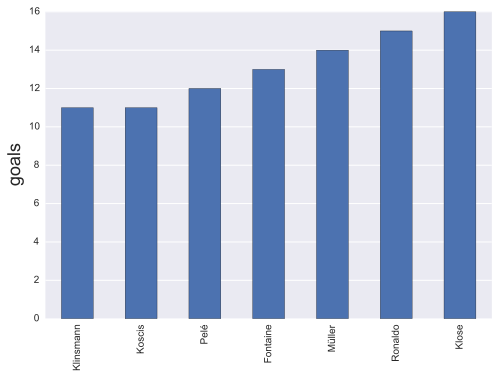

In [19]:
# Make a bar chart of goals
ax = df_wc.sort('goals').plot(y='goals', kind='bar', legend=False)
plt.ylabel('goals')
ax.xaxis.grid(False)

### Combining the cross-sectional area data into a `DataFrame`
Now, back to our cross-sectional area data.  We can combine these data into a `DataFrame` as well, *even though they have differing numbers of data points*.  However, because that `df_low` and `df_high` are not `Series`, we cannot just use the method we used for the footballers.  Instead, we will use the `pd.concat()` function to concatenate `DataFrame`s.

An added complication is that, as they are now, the two `DataFrames` have the same column heading of `0`.  We should change that for each before concatenating.

In [20]:
# Change column headings
df_low.columns = ['low']
df_high.columns = ['high']

# Take a look
df_high

,high
0,1683
1,2061
2,1792
3,1852
4,2091
5,1781
6,1912
7,1802
8,1751
9,1731


Now, we can concatenate the two `DataFrame`s into one.  We just pass a tuple with the `DataFrame`s we want to concatenate as an argument.  We specify the kwarg `axis = 1` to indincate that we want to have two columns, instead of just appending the second `DataFrame` at the bottom of the first (as we would get with `axis = 0`).

In [21]:
# Concatenate DataFrames
df = pd.concat((df_low, df_high), axis=1)

# See the result
df

,low,high
0,1840,1683
1,2090,2061
2,2169,1792
3,1988,1852
4,2212,2091
5,2339,1781
6,1989,1912
7,2144,1802
8,2290,1751
9,1920,1731


Note that the shorter of the two columns was filled with `NaN`, which means "not a number."  This `DataFrame` structure makes it easier to make plots.  For example, you may have wondered why we did not make boxplots from the data before.  The reason was because it was too syntactically painful without the elegance of `DataFrame`s.  We can just directly use the built-in plotting capabilities.

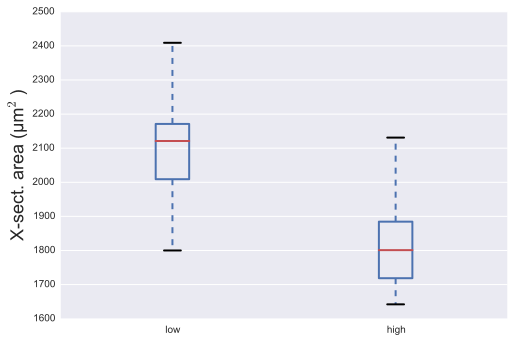

In [22]:
ax = df.plot(kind='box')
plt.ylabel('X-sect. area (µm$^2$)')
ax.xaxis.grid(False)

Here, the red lines are the median, the top and bottom of the box are the 75th and 25th percentile, respectively, and the whiskers cover the total extent of the measurements.

### Outputting a new CSV file
We can now write out a single CSV file with the `DataFrame`.  We use the `index` kwarg to ask Pandas now to explicity write the indices to the file.

In [23]:
# Write out DataFrame
df.to_csv('xa_combined.csv', index=False)

Now when we load the data, we get a convenient `DataFrame`.

In [24]:
# Load DataFrame
df_reloaded = pd.read_csv('xa_combined.csv')

# Take a look
df_reloaded

,low,high
0,1840,1683
1,2090,2061
2,2169,1792
3,1988,1852
4,2212,2091
5,2339,1781
6,1989,1912
7,2144,1802
8,2290,1751
9,1920,1731


### Beeswarm plots
Besides the fact that I hate dashed lines when they are unnecessary, I also believe that you should plot all points when the number of points is below about 100.  A good way to do this is a **beeswarm plot**.  We'll use `pybeeswarm` to do this.

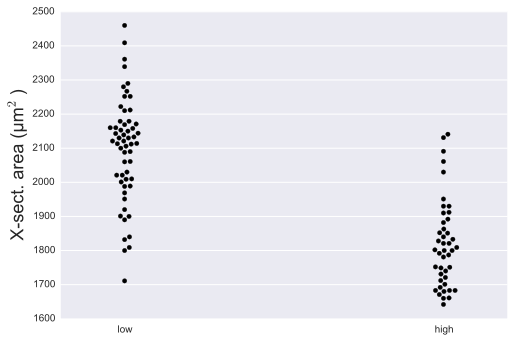

In [35]:
# pybeeswarm needs list of NumPy arrays for plotting
list_of_data = [df['low'].dropna(), df['high'].dropna()]
labels = ['low', 'high']

# Generate a beeswarm plot
_, ax = beeswarm.beeswarm(list_of_data, labels=labels)
plt.ylabel('X-sect. area (µm$^2$)')
ax.xaxis.grid(False)

## A note on tidy data
Hadley Wickham wrote a [great article](http://www.jstatsoft.org/v59/i10/paper) in favor of "tidy data."  Tidy `DataFrame`s follow the rules:
1. Each variable is a column.
2. Each observation is a row.
3. Each type of observation has its own separate `DataFrame`.

This is less pretty to visualize as a table, but we rarely look at data in tables.  In my brief experience since taking Wickham's words to heart, I can say that keeping tidy `DataFrame`s makes life much easier!

A tidy `DataFrame` of the cross-sectional area data would have two columns, "food density" and "cross-sectional area (sq micron)."  Remember, each variable is a column.  Each row, then corresponds to an individual measurement.  This results in a lot of repeated entries (we'll have 44 `high`s), but it is very clean logically and easy to work with.  Let's tidy our `DataFrame`.  The `pd.melt()` function makes this easy.

In [36]:
pd.melt(df, var_name='food density', 
        value_name='cross-sectional area (sq micron)').dropna()

,food density,cross-sectional area (sq micron)
0,low,1840
1,low,2090
2,low,2169
3,low,1988
4,low,2212
5,low,2339
6,low,1989
7,low,2144
8,low,2290
9,low,1920


Saving this `DataFrame` takes a bit more storage, but it is much clearer.  For example, it does not rely on comments to give the units of the measurements.

Not to worry, the default plotting still works with this format.

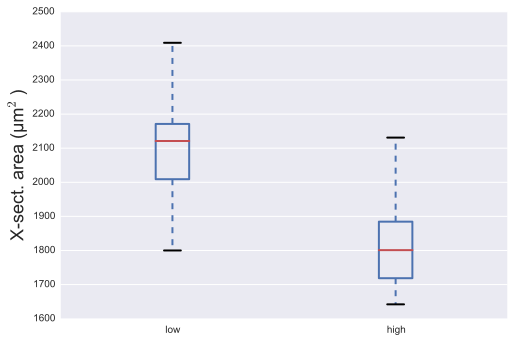

In [38]:
ax = df.plot(kind='box')
plt.ylabel('X-sect. area (µm$^2$)')
ax.xaxis.grid(False)